## Oja's Rule

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.preprocessing import normalize

sns.set(font_scale=1.5)

In [2]:
# Create Data
x = 0.5 * np.random.normal(size=500)
y = 0.05 * np.random.normal(size=500)
z = 0.07 * np.random.normal(size=500)

In [4]:
# Assemble X
X = np.array([x , y , z]).T
X.shape

(500, 3)

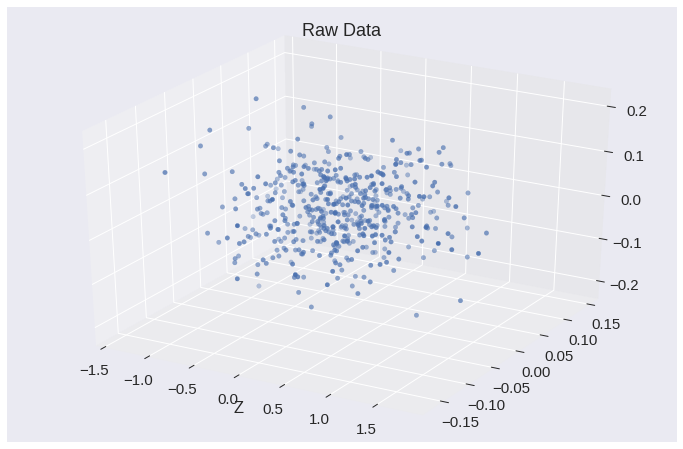

In [5]:
# Plot Raw Data
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2])

# Plot stuff
ax.set_title('Raw Data')
ax.set_xlabel('X')
ax.set_xlabel('Y')
ax.set_xlabel('Z')
plt.show()

In [31]:
def ojas_rule(X,learning_rate=0.01,iterations=10000):
    # Iniciate weights
    w = np.array([0.5,0.5,0.5])
    w = w.reshape(-1,1)
    # Normalize
    w = normalize(w, axis=0)
    
    # Init W
    W = np.copy(w)

    # Train - Fit
    for i in range(1,10000):
        # out = X * w
        output = np.dot(X,w)
        # feedback = X - out * w.T
        feedback = X - np.dot(output,w.T)
        # delta = learning_rate * output.T * feedback
        delta = learning_rate * np.dot(output.T,feedback)
        # Update weight
        w = w + delta.T
        # Normalize
        w = normalize(w, axis=0)
        # Add to W
        W = np.concatenate((W,w),axis=1)
    return W

In [32]:
W = ojas_rule(X)

In [18]:
w = W[:,-1]
print W.shape
print w

(3, 10000)
[ 0.99996242 -0.00607458  0.00618552]


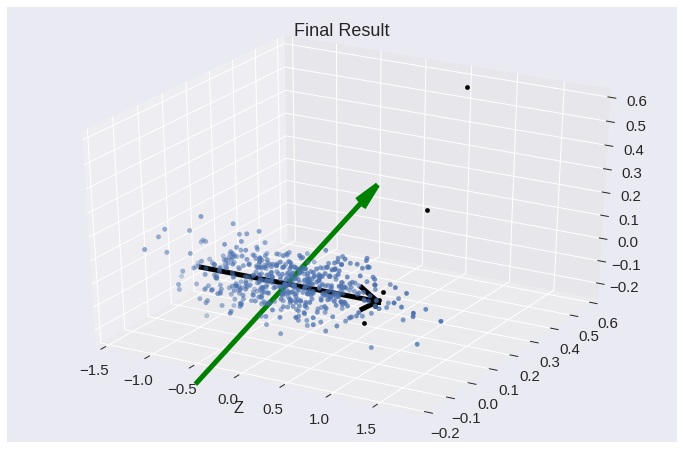

In [33]:
# Plot result
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Plot raw points
ax.scatter(X[:,0], X[:,1], X[:,2])

# Plot a dot for every point through the learning process
for i in range(W.shape[1]):
    ax.scatter(W[:,i][0],W[:,i][1], W[:,i][2], color='black')

W[:,0] = W[:,0] * 1
W[:,-1] = W[:,-1] * 2
# First weight
ax.quiver(0,0,0, W[:,0][0],W[:,0][1], W[:,0][2], color='green', pivot='middle',
         arrow_length_ratio=0.1, linewidths=5)
# Last weight
ax.quiver(0,0,0, W[:,-1][0],W[:,-1][1], W[:,-1][2], color='black', pivot='middle',
         arrow_length_ratio=0.1, linewidths=5)

# Plotting stuff
ax.set_title('Final Result')
ax.set_xlabel('X')
ax.set_xlabel('Y')
ax.set_xlabel('Z')

plt.show()
